#  Binned Analysis

---
**License**

 Binned Analysis

 Sat Jul 9 12:00:00 2025\
 Copyright  2025\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \ Henique Cardoso Naves Lettieri <henrique.cnl23@uel.br> \ Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---
 binned_analysis\
 Copyright (C) 2025 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Henrique Cardoso Naves Lettieri <henrique.cnl23@uel.br>, Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

## Libraries & Configs

In [1]:
import sys
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/ESMCMC")
sys.path.insert(0, "/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/Ascaso_Extended_Calibration")

from esmcmc_rm_relation_script import catalog_fit, esmcmc
from AEC_data_binning import BinnedData as BData

#NumCosmo
from numcosmo_py import Ncm, Nc, GObject
Ncm.cfg_init()

#Useful packages
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

#GCR Catalogs
sys.path.insert(0, "/global/homes/c/cinlima/gcr-catalogs")
import GCRCatalogs
GCRCatalogs.set_root_dir_by_site("nersc")


## Data

In [2]:
id_data = Table.read('/global/homes/c/cinlima/NumCosmo/notebooks/richness_proxy/CatalogsMatching/match_ID.fits')
id_data['halo_mass'].name = 'mass'

## Binned data

We reconstruct the mean calculating the average of richness $\lambda$ weighted by the richness error $\lambda_{\mbox{Err}}$ in each bin.
$$
\hat{\mu} =  \frac{1}{\sum_j \lambda_{\mbox{Err}_j}} \sum_i \lambda_i \frac{1}{ \lambda_{\mbox{Err}_i}}
$$

For standard deviation we use:
$$
\hat{\sigma} = \sqrt{ \sum_i \frac{ | \ln \lambda_i - \ln \hat{\mu}|}{ N - 1} }
$$


In [3]:
bd = BData(id_data, 0.01, 0.05)
binned_mean = bd.get_bins_mean()
binned_std = bd.get_bins_std()

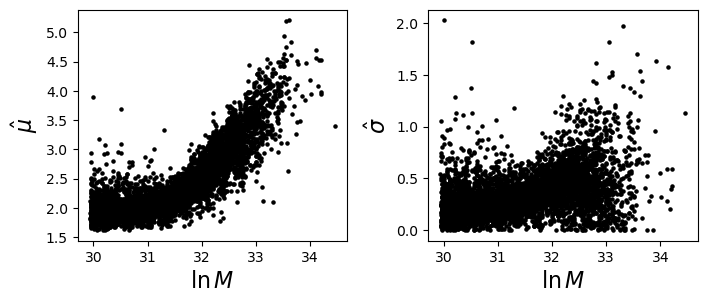

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(8,3))
plt.subplots_adjust(wspace=0.3)

axs[0].scatter(np.log(binned_mean["mass"]), np.log(binned_mean["richness"]), c='k', s=5)
axs[0].set_ylabel('$\hat{\mu}$', fontsize=16)
axs[0].set_xlabel('$\ln M$', fontsize=16)

axs[1].scatter(np.log(binned_mean["mass"]), binned_std, c='k', s=5)
axs[1].set_xlabel('$\ln M$', fontsize=16)
axs[1].set_ylabel('$\hat{\sigma}$', fontsize=16)

plt.show()

## Comparison

In [5]:
N_WALKERS = 1200

mcat1 = Ncm.MSetCatalog.new_from_file_ro('id.fits', N_WALKERS * 75)
mset1 = mcat1.get_mset()
model1 = mset1.peek_by_name('NcClusterMass')

In [6]:
mean1 = np.array([model1.get_mean(np.log(id_data['mass'])[i], id_data['redshift'][i]) for i in range(len(id_data['mass']))])
std1 = np.array([model1.get_std(np.log(id_data['mass'])[i], id_data['redshift'][i]) for i in range(len(id_data['mass']))])

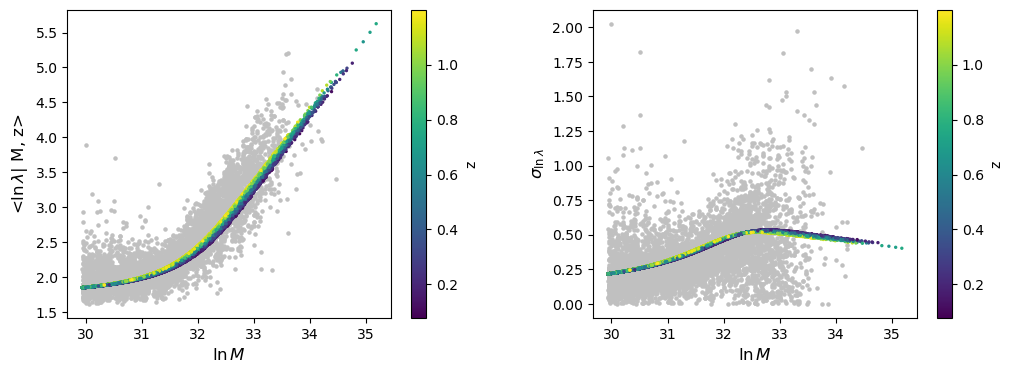

In [9]:
fig = plt.figure(figsize=(12,4))

ax2 = fig.add_subplot(1,2, 1)
ax3 = fig.add_subplot(1,2, 2)
plt.subplots_adjust(wspace=0.3)

ax2.scatter(np.log(binned_mean["mass"]), np.log(binned_mean["richness"]), c='silver', s=5)
p2 = ax2.scatter(np.log(id_data['mass']), mean1 , c = id_data['redshift'], s=2.0, cmap='viridis')
ax2.set_ylabel('<$\ln\lambda$| M, z>', fontsize=12)
ax2.set_xlabel('$\ln M$', fontsize=12)
fig.colorbar(p2, ax=ax2, label='z')

ax3.scatter(np.log(binned_mean["mass"]), binned_std, c='silver', s=5)
p2 = ax3.scatter(np.log(id_data['mass']), std1 , c = id_data['redshift'], s=2.0, cmap='viridis')
ax3.set_ylabel('$\sigma_{\ln \lambda}$', fontsize=12)
ax3.set_xlabel('$\ln M$', fontsize=12)
fig.colorbar(p2, ax=ax3, label='z')

plt.show()